
## Питоновский код

 ```python
print('Python code block')
 ```

# Тестовая тетрадка

Тетрадка создана для проверки работы модуля работы с тетрадками IPython для системы mldev

## Пайплайн тетрадки:
### Блок с fencedCode должен быть единственным в ячейке

```yaml
#%mldev nb_context

notebook_deps:
  printHello_exec: def_printHello
  plot: imports get_plot_data

pipeline:
  - plot
  - printHello_exec
  - regression
  
results: [koef, intercept]
 ```

 
## Питоновский код

 ```python
print('Python code block')
 ```


## Питоновский код

 ```python
print('Python code block')
 ```

In [ ]:
#%mldev imports

import matplotlib.pyplot as plt

In [ ]:
#%mldev get_plot_data

s = 32
x = range(10)
y = range(10)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array([11, 18, 14, 43, 12, 50, 58, 13]).reshape(-1, 1)
y = np.array([4, 8, 6, 19, 5, 19, 25, 7]).reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)

# %mldev regression start

In [ ]:
x_test = np.array([0, 15, 17, 20, 38, 44, 50, 70]).reshape(-1, 1)
prediction = reg.predict(x_test)
print(reg.coef_, reg.intercept_)

In [ ]:
plt.scatter(x, y)
plt.plot(x_test, prediction)

plt.title("Линейная регрессия для времени")
plt.xlabel('Кол-во ячеек')
plt.ylabel('Время, мин.')

plt.show()

In [ ]:
koef = reg.coef_[0][0]
intercept = reg.intercept_[0]
print(koef, intercept)

#%mldev regression end

In [ ]:
# %mldev def_printHello

def printHello():
    print('hello')

In [ ]:
#%mldev printHello_exec

printHello()

hello


/home/ruslan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


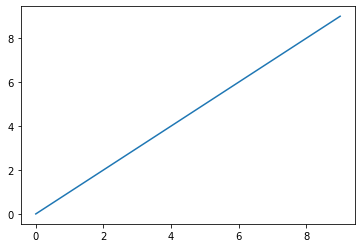

In [ ]:
# %mldev plot
fig, ax = plt.subplots()
ax.plot(x,y)
# fig.show()

In [ ]:
#%mldev ls

!ls

IPythonAPITest.ipynb  nb_context.yml  notebookExamples	start_ipython_api.py


In [ ]:
#%mldev who_magic

%who_ls function

['printHello']

In [ ]:
# %mldev block start

print('this is begining cell')

this is begining cell


In [ ]:

print('this is middle cell')

this is middle cell


In [ ]:

print('this is another middle cell')

this is another middle cell


In [ ]:
print('this is the last cell')

#%mldev block end

In [ ]:
!pip3 install markdown_it_py
from markdown_it import MarkdownIt
import nbformat
import io
import re
import nltk

In [ ]:
md = MarkdownIt()

with open('IPythonAPITest.ipynb') as f:
  notebook = nbformat.read(f, nbformat.NO_CONVERT)

cells = notebook.cells
mdcells = [x.source for x in cells if x.cell_type == 'markdown']
parsed_mdcells = list(map(lambda text: md.parse(text), mdcells))

for parsed in parsed_mdcells:
  for token in parsed:
    token_dict = token.as_dict()
    if token_dict['type'] == 'fence' and token_dict['tag'] == 'code' and token_dict['info'] == 'yaml':
      if ('%mldev nb_context' in token_dict['content']):
        print(token_dict['content'])

#%mldev nb_context

notebook_deps:
  printHello_exec: printHello
  plot: imports s

test_sequence:
#   - ls
  # - who_magic
  - plot
  - block
  - printHello_exec
  - regression
  # - who_magic
  
results: [koef, intercept]



In [ ]:
cell_sources = {}
started_block = ''
for cell in notebook.cells:
    if cell.cell_type == 'code':
        if started_block:
            cell_sources[started_block] = "\n".join([cell_sources[started_block], cell.source])
        for line in cell.source.split('\n'):
            cell_names = re.findall(r'#\s*%mldev\s+(\w+\s*\w+)', line)
            if len(cell_names):
                cell_name = cell_names[0].split()
                if len(cell_name) == 1:
                    cell_sources[cell_name[0]] = cell.source
                else:
                    if cell_name[1] == 'start':
                        started_block = cell_name[0]
                        cell_sources[started_block] = cell.source
                    elif cell_name[1] == 'end':
                        started_block = ''
print(cell_sources['regression'])
print(cell_sources['block'])

# %mldev regression start

x_cells = [11, 18, 14, 43, 12, 50, 58, 13]
y_time = [4, 8, 6, 19, 5, 19, 25, 7]
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(x_cells).reshape(-1, 1)
y = np.array(y_time).reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)
x_test = np.array([0, 15, 17, 20, 38, 44, 50, 70]).reshape(-1, 1)

prediction = reg.predict(x_test)
prediction
plt.scatter(x, y)
plt.plot(x_test, prediction)

plt.title("Линейная регрессия для времени")
plt.xlabel('Кол-во ячеек')
plt.ylabel('Время, мин.')

plt.show()
koef = reg.coef_[0][0]
intercept = reg.intercept_[0]

print(koef, intercept)

#%mldev regression end
# %mldev block start

print('this is begining cell')

print('this is middle cell')

print('this is another middle cell')
print('this is the last cell')

#%mldev block end


In [ ]:
import IPython

In [ ]:
shell = IPython.core.interactiveshell.InteractiveShell()

result = shell.run_cell('a')
print(result.error_in_exec)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-1-3f786850e387> in <module>()
----> 1 a

NameError: name 'a' is not defined
name 'a' is not defined
